Checkpoints sugeridos:

1) Coleta de dados via web scrapping. Bibliotecas como Selenium e BeautifulSoup podem ajudar. <br>
<br>
2) Análise exploratória: Gráficos de dispersão entre nota padronizada dos dois rankings. São correlacionados? Existem outliers?<br>
<br>
3) Modelo explicativo: Regressão linear múltipla entre os 4 itens do ranking do Legisla Brasil e a nota do Ranking dos Políticos, por exemplo. Os 4 itens do Legisla explicam qual variabilidade do Ranking dos Políticos?<br>
<br>
4) Discussão: Por que são diferentes? Por que são iguais? Existem viéses políticos? São apartidários? Qual sua opinião que justifique os resultados?

### Tratamento dos dados dos dois sites

In [1]:
import pandas as pd
import numpy as np
import re
from unidecode import unidecode #retirar acentos
import requests 
import re
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#leitura dos dados
df_site1 = pd.read_csv('rank_legislabr_completo.csv') 
df_site2 = pd.read_csv('df_site2.csv')
df_merge = pd.read_csv('df_merge.csv')

In [3]:
#tratamento inicial dos dataframes
del df_site1['Unnamed: 0']

In [4]:
# criando novo dataframe sem valores não comuns entre as tabelas
df_3 = pd.merge(df_site1, df_site2)
df_3 = df_3.rename(columns={'nota': 'nota_site2'})

Foi verificado que alguns (78) deputados não estão presentes na lista dos dois sites, <br>
sendo assim foi optado por removê-los da análise.

In [5]:
#df_3

In [6]:
# criando coluna com o valor da média ponderada entre as notas do primeiro site
df_3.insert(7, 'avg_site1', (df_3['n_prod_leg']*8 + df_3['n_fisc']*5 + df_3['n_mobi']*3 + df_3['n_alin_partd']*1)/17)

In [7]:
df_3.head()

,nome,estado,partido,n_prod_leg,n_fisc,n_mobi,n_alin_partd,avg_site1,nota_site2
0,abou anni,São Paulo,UNIÃO,3.8,0.9,2.4,6.4,2.852941,6.55
1,acacio favacho,Amapá,MDB,2.6,0.2,2.1,6.4,2.029412,6.12
2,adolfo viana,Bahia,PSDB,2.8,0.9,2.4,5.5,2.329412,6.82
3,adriana ventura,São Paulo,NOVO,6.4,2.9,7.3,10.0,5.741176,8.24
4,adriano do baldy,Goiás,PP,2.3,0.0,2.1,10.0,2.041176,6.82


Através da análise bivariada entre a média do site 1 (https://indice.legislabrasil.org/public/) e o site 2 (https://www.politicos.org.br/) há indicios que mostram uma correlação negativa entre eles. Ou seja, deputados que tem nota alta no site 1 tendem a ter nota baixa no site 2 e vice-versa.

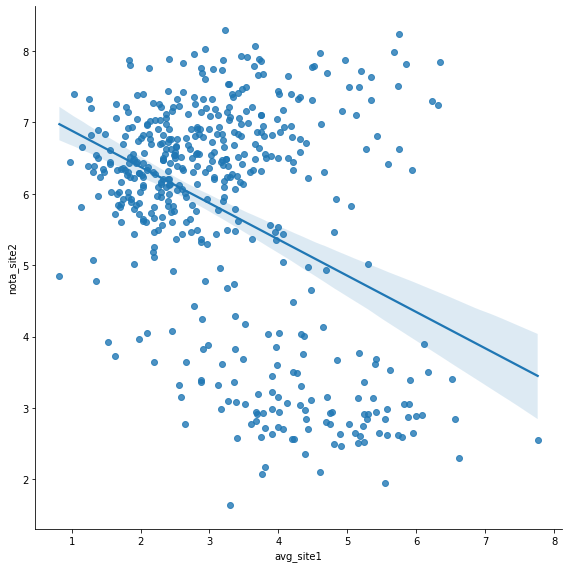

In [8]:
'''ax1 = df_3.plot(kind='scatter', x='avg_site1', y='nota_site2', color='black')    
plt.rcParams['figure.figsize'] = (15,10)
#plt.figure(figsize=(10, 10)) 
plt.show()'''
sns.lmplot(x='avg_site1', y='nota_site2', data=df_3, height=8)
#plt.rcParams['figure.figsize'] = (10,10)
plt.show()

Um quesito chamou a atenção nessa análise. Detectou-se uma certa subjetividade adota pelo site 2 quando propõe notas baseada no direcionamento de um conselho do próprio. Algumas notas são compostas de acordo com "o posicionamento dos parlamentares nas principais votações do Congresso". Segundo o site "O aproveitamento de acerto nos votos reflete a nota do político neste critério". Apesar do Conselho ser composto por 32 pessoas não é exposto como ele é formado, qual a diversidade do corpo, se é representativo com a população interessada, no caso a população brasileira. Deixando parecer que o certo ou errado na votação do candidato pode representar uma nota enviesada. 
<br>
<br>
Com isso surgiu a curiosidade de verificar a nota por ideologia do partido dos deputados. Em resumo, classificando o partido em Esquerda, Centro e Direita.
<br>


### Criando nova coluna para classificação ideólogica dos partidos. <br>
Para tal, foi utilizida classificação dada pelo jornal Folha na seguinte matéria:
https://www1.folha.uol.com.br/poder/2022/09/o-que-faz-um-partido-ser-de-direita-ou-esquerda-folha-cria-metrica-que-posiciona-legendas.shtml
    
Esse ranking levou em consideração o comportamento do partido de acordo com 7 quesitos: 
Votação dos deputados na legenda da câmara; coligações; autodeclaração dos congressistas; 
frente parlamentares, opinião de especialistas, migração partidária e o 
posicionamento no GPS Ideológico da Folha (baseado em seguidores do Twitter, atualizado em 2022).
A classificação ficou a seguinte: <br>
<br>
Esquerda: PCO, PSTU, PSOL, UP, PT, PCB, REDE, PCdoB, PSB, PV e PDT<br>
<br>
Centro: Solidariedade, Cidadania, Avante, PSD, PROS, MDB, Agir, PSDB, Podemos e PMN<br>
<br>
Direita: Rebuplicanos, DC, PRTB, PMB, PP, PTB, União, Patriota, PSC, PL e Novo<br>
<br>
<br>
As listas foram reduzidas a somente partidos contidos nos dataset gerados pelo webscraping.

In [9]:
esquerda = ['PSOL', 'PT', 'REDE', 'PCdoB', 'PSB', 'PV', 'PDT']
centro = ['SOLIDARIEDADE', 'CIDADANIA', 'AVANTE', 'PSD', 'PROS', 'MDB', 'PSDB', 'PODE']
direita = ['REPUBLICANOS', 'PP', 'PTB', 'UNIÃO', 'PATRIOTA', 'PSC', 'PL', 'NOVO']

b = list(df_3['partido'])
ideologia = []
for x in b:
    if x in esquerda:
        #print('esquerda')
        ideologia.append('esquerda')
    elif x in direita:
        #print('direita')
        ideologia.append('direita')
    else:
        ideologia.append('centro')

df_3.insert(3, 'ideologia', ideologia)

Graficamente também fica visível a suposição anteriormente feita

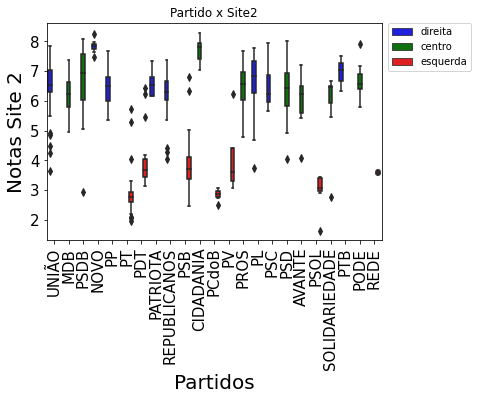

In [10]:
#boxplot
plt.title('Partido x Site2')
graph_boxp = sns.boxplot(data=df_3, x='partido', y='nota_site2', hue = df_3['ideologia'], palette=["blue", "green", "red"])
graph_boxp.set_xlabel("Partidos",fontsize=20)
graph_boxp.set_ylabel("Notas Site 2",fontsize=20)
plt.xticks(rotation=90, size=15)
plt.yticks(size=15)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.rcParams['figure.figsize'] = (15,10)
plt.show()

Comparando a média por ideologia também é constatado que Centro e Direita tem notas similares e opostas a Esquerda. No site 1 o primeiro grupo tem notas mais baixas que o segundo grupo, acontecendo o inverso no site 2.

In [11]:
#df_3.groupby(['partido']).mean().sort_values(['nota_site2'])
site1_vs_site2 = df_3.groupby(['ideologia']).mean()
site1_vs_site2.drop(['n_prod_leg', 'n_fisc', 'n_mobi', 'n_alin_partd'], axis=1, inplace=True)
site1_vs_site2

,avg_site1,nota_site2
ideologia,,
centro,2.750615,6.406418
direita,2.971302,6.540544
esquerda,4.370895,3.322435


Pela análise dos gráficos é possivel ver que as notas dos deputados estão agrupadas de acordo com a ideologia do partido ao qual pertencem.

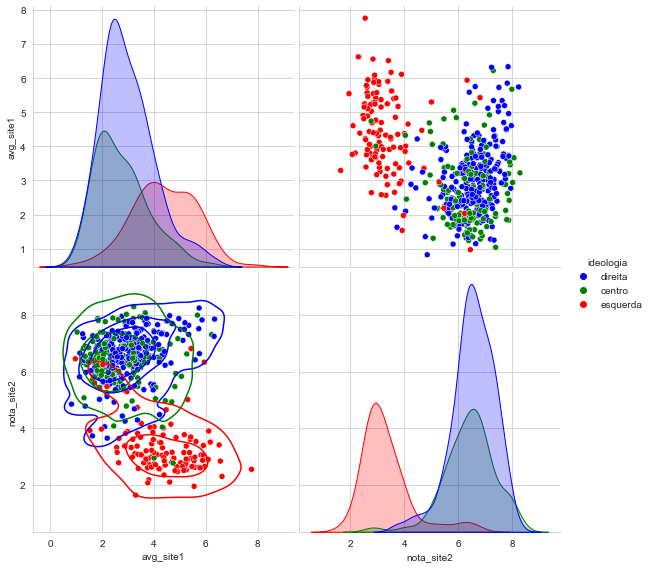

In [12]:
sns.set_style("whitegrid");
x_vars = ['avg_site1', 'nota_site2']
y_vars = ['avg_site1', 'nota_site2']
g_1 = sns.pairplot(df_3, hue="ideologia", height=4, palette=["blue", "green", "red"], x_vars=x_vars,
    y_vars=y_vars);
g_1.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

É também feita uma análise das notas que compõe a média do site 1.
<br>
Onde há indicios de dominio das maiores notas para partidos com ideologias de esquerda.

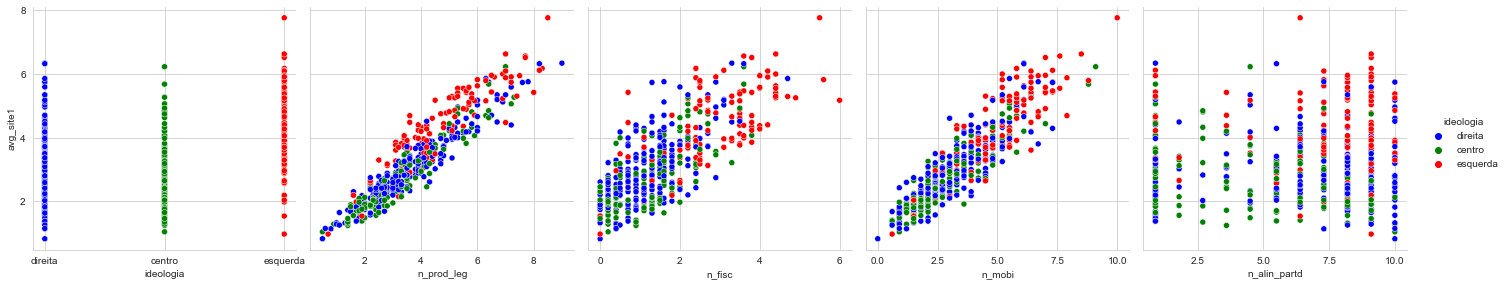

In [13]:
sns.set_style("whitegrid");
x_vars_2 = ['ideologia', 'n_prod_leg', 'n_fisc', 'n_mobi', 'n_alin_partd']
y_vars_2 = ['avg_site1']
graph_2 = sns.pairplot(df_3, hue="ideologia", height=4, palette=["blue", "green", "red"], x_vars=x_vars_2,
    y_vars=y_vars_2)
#mpl.rcParams["axes.labelsize"] = 22
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = (15,10)
plt.show()

Comparando as relações entre notas dos dois site percebe-se que as notas estão bem separadas a depender da Ideologia do partido.<br>
Vale salientar que de acordo com a metodolgia do site 1 as notas são atribuidas de acordo os feitos pelos deputados, tais como:<br>
Apresentação de projetos; <br>
Protagonismo de autoria; <br>
Relevância das autorias (nesse é feita uma seleção do quão o projeto é importante, sendo notas mais altas para projetos que impactam em políticas materiais e notas mais baixa para projetos relacionados às questões subjetivas como nomeação de estradas e condecorações, por exemplo); <br>
Nº de votos em separado apresentados; <br>
Nº de substitutivos apresentados; <br>
Nº de relatorias apresentadas; <br>
Nº presença em Plenário; <br>
Emendas de Plenário; <br>
Nº de solicitações de informações protocoladas; <br>
Proposta de fiscalização e controle protocoladas; <br>
Recebimento de emendas parlamentares (emendas empenhadas); <br>
Emendas de Medidas Provisórias; <br>
Emendas de orçamento; <br>
Projetos de autoria com status especial; <br>
Cargos ocupados na legislatura; <br>
Nº de requerimentos de Audiência Pública; <br>
Desvios da posição majoritária do partido em votações.

Analisando os deputados pela orientação ideológica do partido vemos comportamentos diferentes. Para a direita uma correlação  positiva com uma dispersão menor que nas outras duas categorias. <br>
Para os partidos de Centro vemos uma correlação fraca negativa com dispersão maior que para os partidos de Direita. <br>
Já para os partidos tidos como de Esquerda mostra correlação negativa com dispersão alta também. <br>
As dispersões mais altas são nos valores mais extremos, onde é possível perceber muitos outliers presentes em todas as ideologias. Sendo que na ideologia Direita os outliers estão mais próximos da linha de regressão.

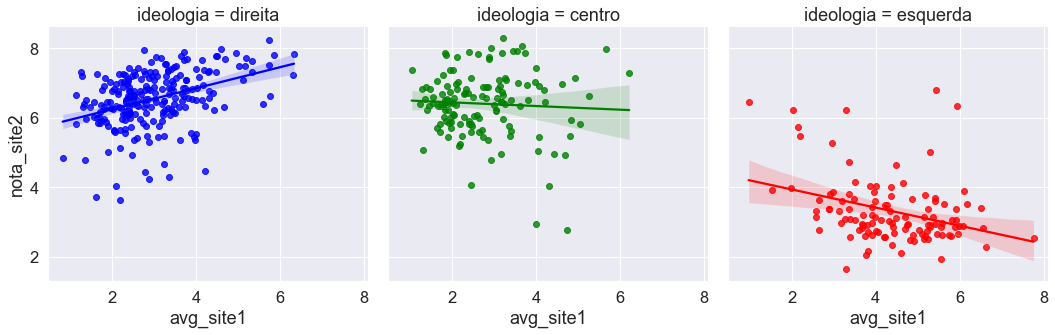

In [14]:
sns.lmplot(x="avg_site1", y="nota_site2", col = 'ideologia', hue = 'ideologia', data=df_3, palette=["blue", "green", "red"])
plt.show()

In [15]:
df_3.to_csv('df_after_AD.csv')